In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fraud_df = pd.read_csv('fraud_dataset.csv')
fraud_df

,transaction_id,transaction_amount,location,merchant,age,gender,fraud_label
0,1,1000.0,New York,ABC Corp,35,M,0
1,2,500.0,Chicago,XYZ Inc,45,F,0
2,3,2000.0,Los Angeles,ABC Corp,28,M,1
3,4,1500.0,San Francisco,XYZ Inc,30,F,0
4,5,800.0,Chicago,ABC Corp,50,F,0
...,...,...,...,...,...,...,...
81,82,1500.0,Los Angeles,XYZ Inc,31,M,0
82,83,2800.0,San Francisco,ABC Corp,50,F,1
83,84,1350.0,Chicago,XYZ Inc,28,M,0
84,85,920.0,New York,ABC Corp,47,F,0


1. По каждому городу рассчитайте кол-во успешных и неуспешных попыток мошенничества (использовать groupby). Постройте столбчатую диаграмму, где осью X будет город, и по каждому городу будут рядом стоять столбцы с успешными и неуспешными попытками мошенничества (использовать обычный bar или sns.barplot)


In [ ]:
uns_suc_fraud = fraud_df.groupby('location')[['fraud_label']].count()
uns_suc_fraud

,fraud_label
location,
Chicago,22
Los Angeles,21
New York,22
San Francisco,21


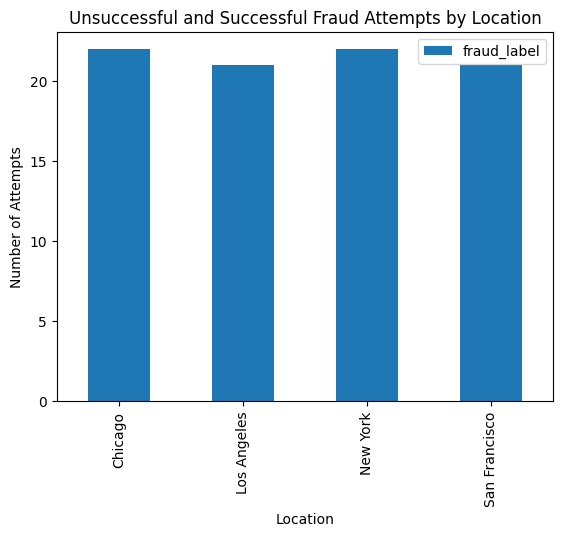

In [ ]:
uns_suc_fraud.plot(kind='bar', stacked=True)
plt.title('Unsuccessful and Successful Fraud Attempts by Location')
plt.xlabel('Location')
plt.ylabel('Number of Attempts')
plt.legend(['fraud_label'])


2) Сделать такой же анализ, только вместо города использовать a) пол b) возрастные группы (<30, 31-35, 36-40, 41-45, 45-50, 51+)

In [ ]:
fem_male = fraud_df.groupby('gender')[['fraud_label']].count()
fem_male

,fraud_label
gender,
F,43
M,43


In [ ]:
def age_group(age):
    if age < 30:
        return '<30'
    elif age >= 30 and age <= 35:
        return '31-35'
    elif age >= 36 and age <= 40:
        return '36-40'
    elif age >= 41 and age <= 45:
        return '41-45'
    elif age >= 46 and age <= 50:
        return '45-50'
    else:
        return '51+'

In [ ]:
fraud_df['age_group'] = fraud_df['age'].map(age_group)
fraud_df

,transaction_id,transaction_amount,location,merchant,age,gender,fraud_label,age_group
0,1,1000.0,New York,ABC Corp,35,M,0,31-35
1,2,500.0,Chicago,XYZ Inc,45,F,0,41-45
2,3,2000.0,Los Angeles,ABC Corp,28,M,1,<30
3,4,1500.0,San Francisco,XYZ Inc,30,F,0,31-35
4,5,800.0,Chicago,ABC Corp,50,F,0,45-50
...,...,...,...,...,...,...,...,...
81,82,1500.0,Los Angeles,XYZ Inc,31,M,0,31-35
82,83,2800.0,San Francisco,ABC Corp,50,F,1,45-50
83,84,1350.0,Chicago,XYZ Inc,28,M,0,<30
84,85,920.0,New York,ABC Corp,47,F,0,45-50


In [ ]:
age_group = fraud_df.groupby('age_group')[['fraud_label']].count()
age_group

,fraud_label
age_group,
31-35,17
36-40,14
41-45,14
45-50,16
51+,12
<30,13


3) Использовать histogram для построения диаграммы с кол-вом успешных и неуспешных попыток мошенничества в зависимости от возраста (использовать bins=6 и stacked=True). Дать словесное описание результата анализа

Text(0.5, 1.0, 'Number of Successful and Unsuccessful Fraud Attempts Depending on Age')

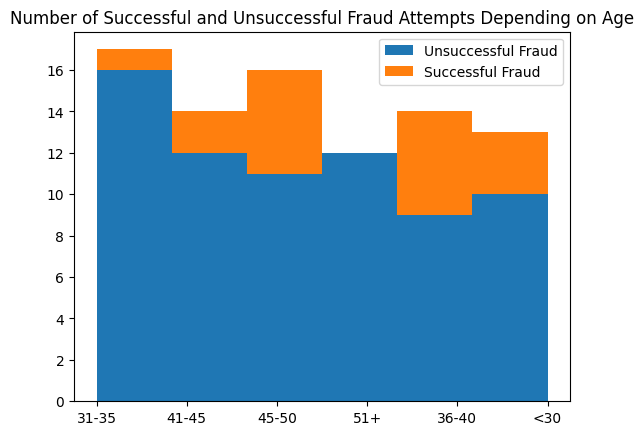

In [ ]:
successful_fraud = fraud_df[fraud_df['fraud_label'] == 1]['age_group']
unsuccessful_fraud = fraud_df[fraud_df['fraud_label'] == 0]['age_group']

plt.hist([unsuccessful_fraud, successful_fraud], bins=6, stacked=True)
plt.legend(['Unsuccessful Fraud', 'Successful Fraud'])
plt.title('Number of Successful and Unsuccessful Fraud Attempts Depending on Age')

# Наибольшее кол-во неуспешных попыток в возрастных группах 45-50 и 50+, а меньшее кол-во в возрастных группах до 30 лет и 30-35 лет.
# Это докащывает то, что несмотря на неуспешные попытки, мошенничество чаще фиксируются в старших возрастных группах.
# Успешные попытки мошенничества равномерно распределены по многим возрастным группам.
# Соответственнно, успешность мошенничества не зависит от возраста.

4) Использовать sns.scatterplot, где осью X будет возраст пользователя, а осью Y будет сумма транзакции. Все точки подсветить разным цветом в зависимости от пола пользователя.

Text(0.5, 1.0, 'Transaction Amount vs Age')

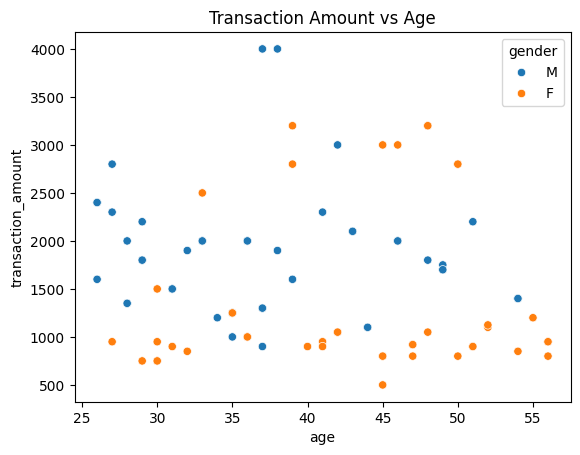

In [ ]:
sns.scatterplot(x='age', y='transaction_amount', hue='gender', data=fraud_df)
plt.title('Transaction Amount vs Age')


5) По возрастным группам (<25, 25-40, >40) построить одну pie-диаграмму попыток мошенничества

In [ ]:
def age_group_2(age):
    if age < 25:
        return '<25'
    elif age >= 25 and age <= 40:
        return '25-40'
    else:
        return '>40'

fraud_df['age_group_2'] = fraud_df['age'].map(age_group_2)
fraud_df

,transaction_id,transaction_amount,location,merchant,age,gender,fraud_label,age_group,age_group_2
0,1,1000.0,New York,ABC Corp,35,M,0,31-35,25-40
1,2,500.0,Chicago,XYZ Inc,45,F,0,41-45,>40
2,3,2000.0,Los Angeles,ABC Corp,28,M,1,<30,25-40
3,4,1500.0,San Francisco,XYZ Inc,30,F,0,31-35,25-40
4,5,800.0,Chicago,ABC Corp,50,F,0,45-50,>40
...,...,...,...,...,...,...,...,...,...
81,82,1500.0,Los Angeles,XYZ Inc,31,M,0,31-35,25-40
82,83,2800.0,San Francisco,ABC Corp,50,F,1,45-50,>40
83,84,1350.0,Chicago,XYZ Inc,28,M,0,<30,25-40
84,85,920.0,New York,ABC Corp,47,F,0,45-50,>40


In [ ]:
fraud_attempt = fraud_df.groupby('age_group_2')[['fraud_label']].count()
fraud_attempt

,fraud_label
age_group_2,
25-40,44
>40,42


Text(0.5, 1.0, 'Fraud Attempts by Age Group')

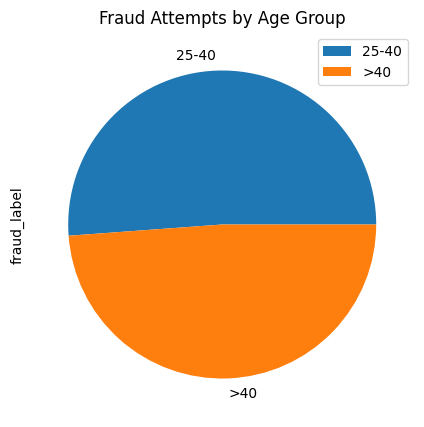

In [ ]:
fraud_attempt.plot.pie(y='fraud_label', figsize=(5, 5))
plt.title('Fraud Attempts by Age Group')

6) По возрастным группам (<25, 25-40, >40) построить три pie-диаграммы, в которых будет распределение попыток мошенничества по городам

In [ ]:
age_group_2 = fraud_df.groupby(['age_group_2', 'location'])['fraud_label'].count()
age_group_2

age_group_2  location     
25-40        Chicago          14
             Los Angeles      14
             New York          7
             San Francisco     9
>40          Chicago           8
             Los Angeles       7
             New York         15
             San Francisco    12
Name: fraud_label, dtype: int64

Text(0.5, 1.0, 'Fraud Attempts by Age Group and Location')

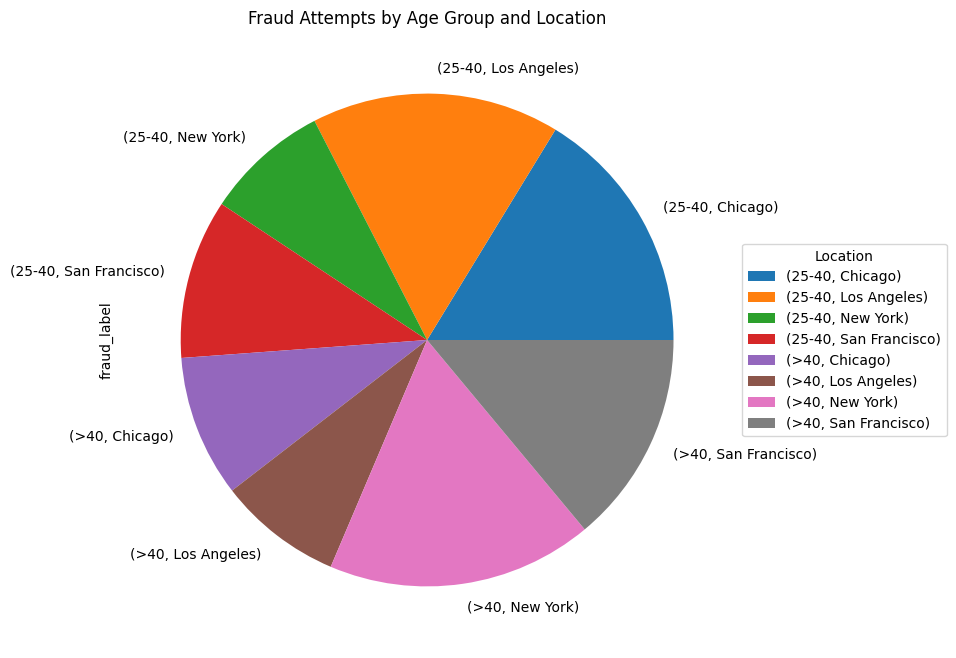

In [ ]:
age_group_2.plot.pie(y=age_group_2,
                     figsize=(8, 8))
plt.legend(title='Location', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Fraud Attempts by Age Group and Location')